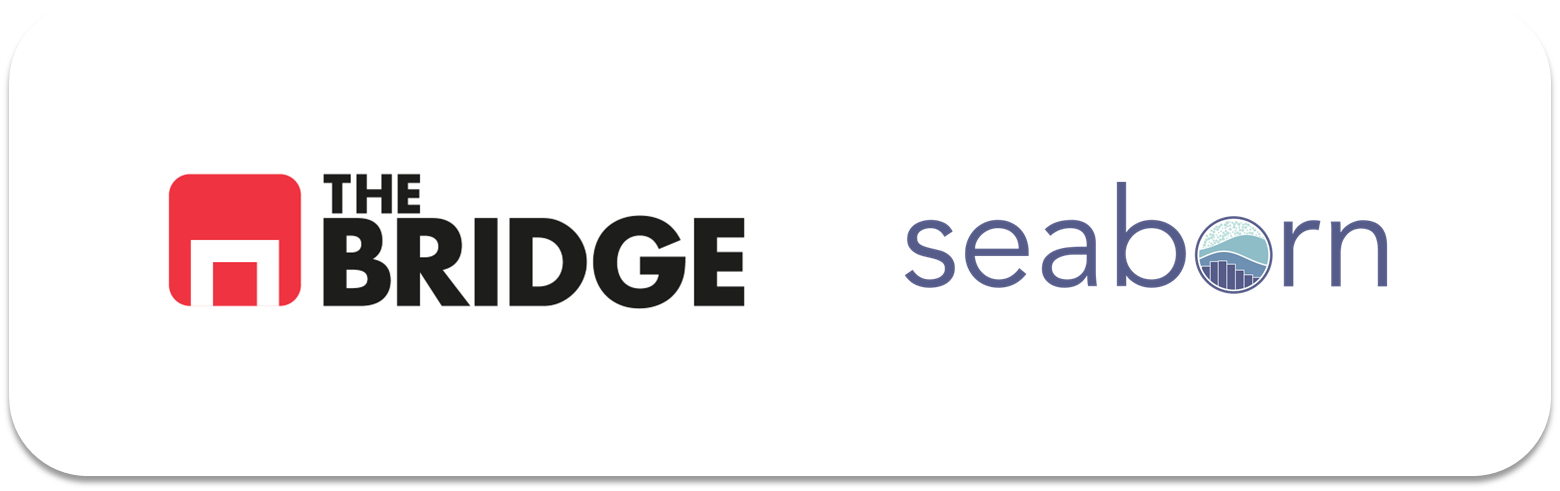

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [221]:
df = pd.read_csv("./data/california_cities.csv")
df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def scatterplot(df_in, num_col_1, num_col_2, cat_col=None, size_chain="area_total_km2", scale=0.75, lege=None):
    plt.figure(figsize=(18, 8))
    
    # Crear el scatterplot
    scatter = sns.scatterplot(
        x=num_col_1,
        y=num_col_2,
        hue=cat_col,
        size=df_in[size_chain] * (1 / scale),
        sizes=(20, 1000),
        data=df_in,
        palette="viridis",
        alpha=0.5,
        legend=False
    )

    if cat_col is not None and lege == "colorbar":
        # Crear barra de color
        norm = plt.Normalize(df_in[cat_col].min(), df_in[cat_col].max())  # Normalización de valores
        sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
        cbar.set_label(cat_col, labelpad=10)  # Etiqueta de la barra de color

        # Agregar leyenda para 'size'
        handles_size, labels_size = scatter.get_legend_handles_labels()
        size_handles = handles_size[df_in[cat_col].nunique():]
        size_labels = labels_size[df_in[cat_col].nunique():]
        
        plt.legend(
            handles=size_chain,
            labels=size_chain,
            title=size_chain,
            loc="lower left",
            bbox_to_anchor=(0.5, 0.5))
    
    else:
        # Configurar la leyenda de 'hue'
        handles_hue, labels_hue = scatter.get_legend_handles_labels()
        unique_colors = df_in[cat_col].nunique()
        
        # Particionar las leyendas para hue y size
        hue_handles = handles_hue[:unique_colors]
        hue_labels = labels_hue[:unique_colors]
        size_handles = handles_hue[unique_colors:]
        size_labels = labels_hue[unique_colors:]

        # Agregar leyenda para 'hue'
        scatter.legend(
            handles=hue_handles,
            labels=hue_labels,
            title=cat_col,
            loc="upper left",
            bbox_to_anchor=(1, 1)
        )
        
        # Agregar leyenda para 'size'
        plt.legend(
            handles=size_chain,
            labels=size_chain,
            title=size_chain,
            loc="lower left",
            bbox_to_anchor=(1, 0.5)
        )
    
    
    
    
    # Configurar ejes
    plt.xlabel(num_col_1)
    plt.ylabel(num_col_2)
    plt.grid(False)
    plt.show()


In [223]:
df.columns

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')

C:\Users\rodri\AppData\Local\Temp\ipykernel_29852\3998137792.py:34: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(
C:\Users\rodri\AppData\Local\Temp\ipykernel_29852\3998137792.py:34: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(


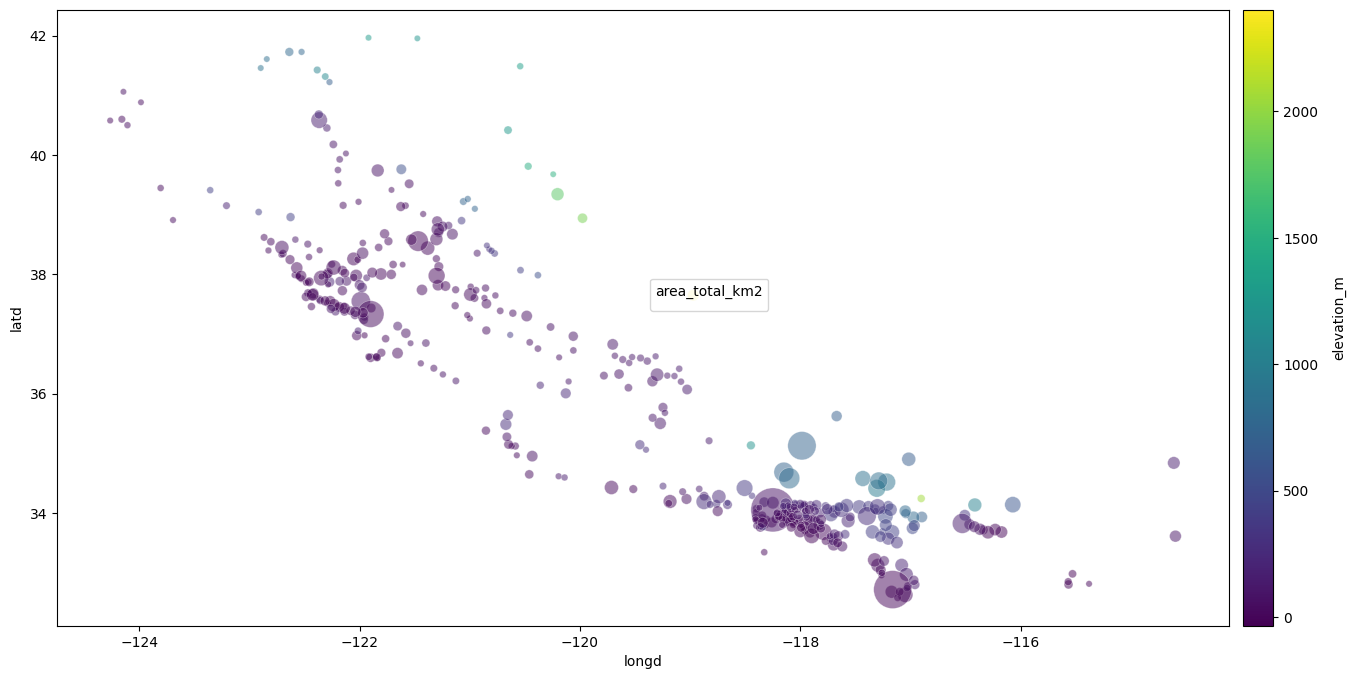

In [224]:
scatterplot(df,"longd",'latd',"elevation_m","area_total_km2",0.75,"colorbar")

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

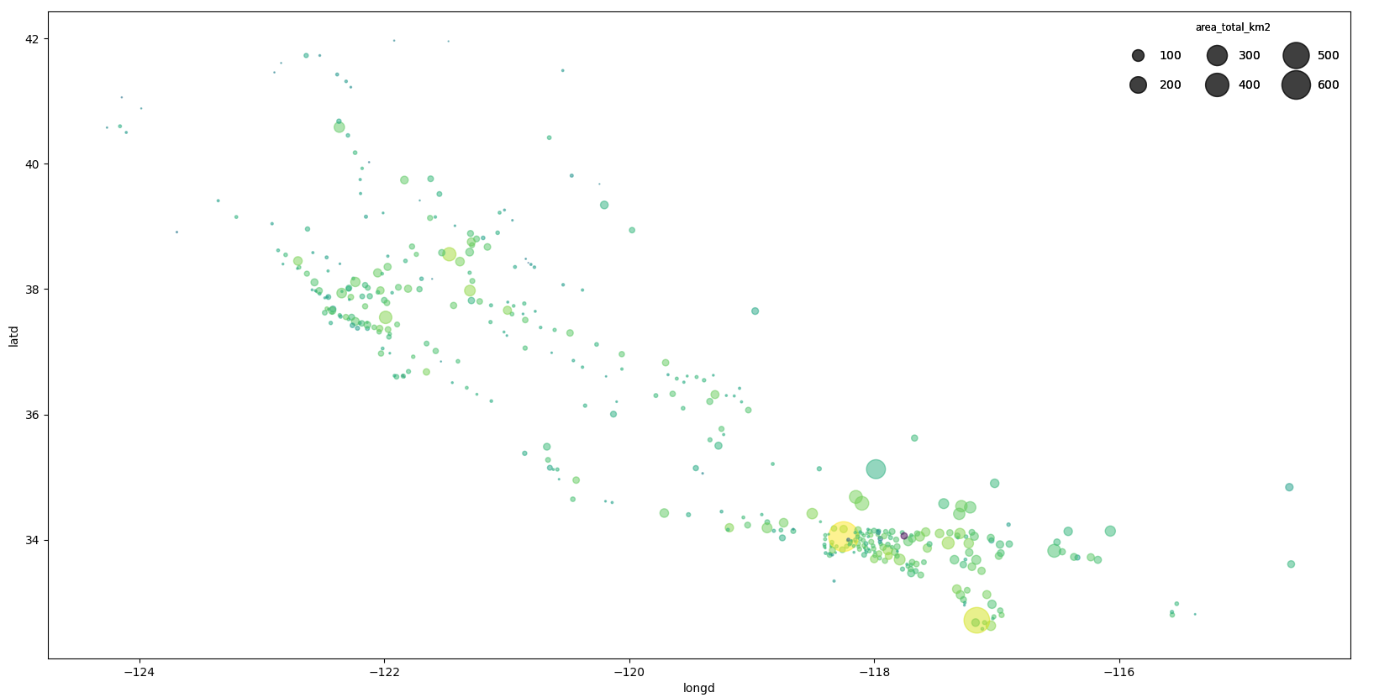

C:\Users\rodri\AppData\Local\Temp\ipykernel_29852\3998137792.py:34: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(
C:\Users\rodri\AppData\Local\Temp\ipykernel_29852\3998137792.py:34: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(


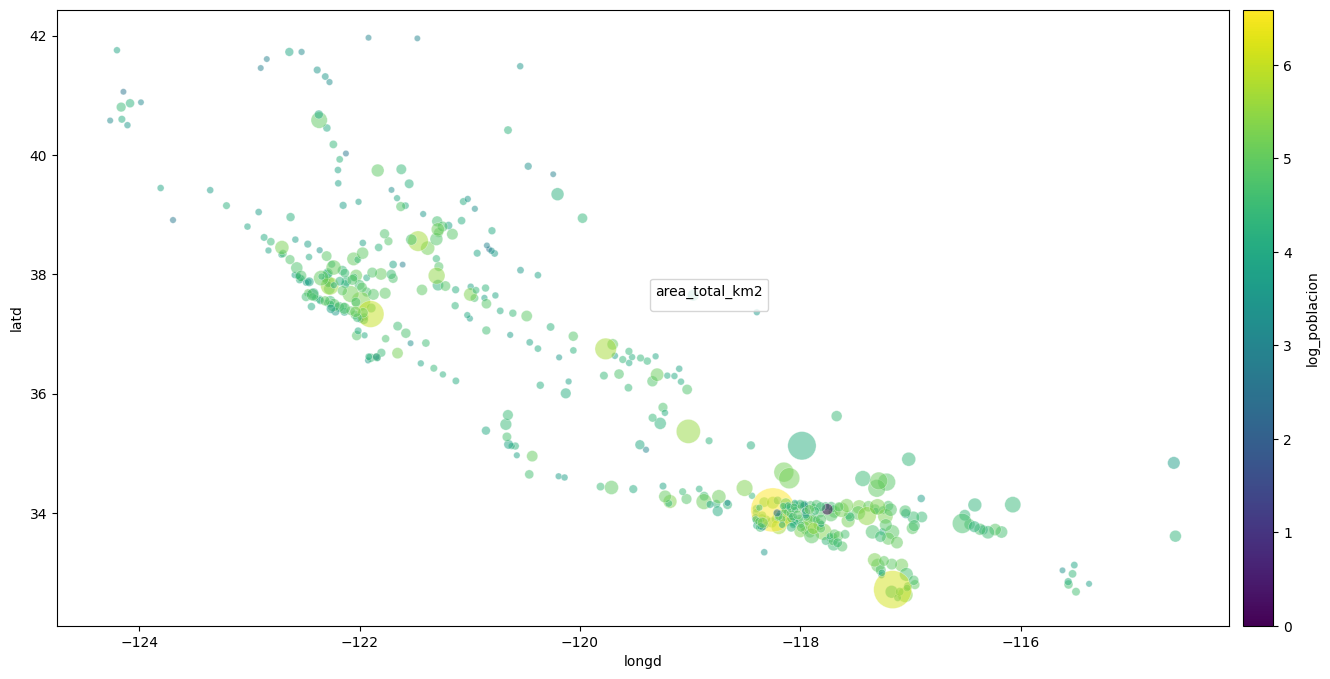

In [225]:
df["log_poblacion"] = df["population_total"].apply(np.log10)

scatterplot(df,"longd",'latd',"log_poblacion","area_total_km2",0.75,"colorbar")

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [226]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [281]:
frecuencias_absoluta = df_titanic.alive.value_counts(normalize=True) * 100
frecuencias_absoluta = frecuencias_absoluta.reset_index()
frecuencias_absoluta.columns = ["alive","percentage"]

C:\Users\rodri\AppData\Local\Temp\ipykernel_29852\3089334637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x="alive",


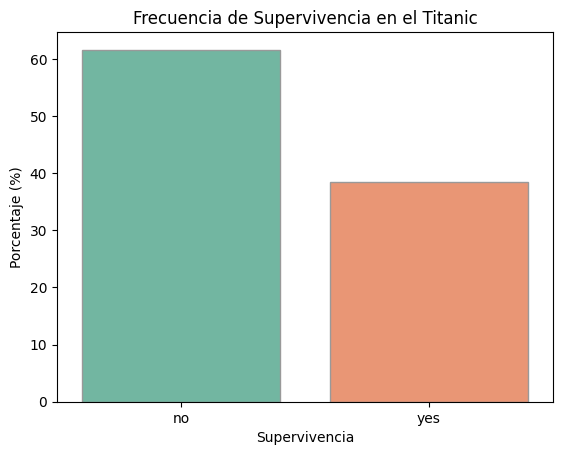

In [283]:
# Pintamos modo1
# Pintamos el gráfico
fig = sns.barplot(x="alive",
                  y="percentage",
                  edgecolor=".6",
                  palette="Set2",
                  data=frecuencias_absoluta)

# Configurar etiquetas y título
plt.xlabel("Supervivencia")  # Usamos plt para acceder a las funciones de etiquetas
plt.ylabel("Porcentaje (%)")
plt.title("Frecuencia de Supervivencia en el Titanic")

# Mostrar el gráfico
plt.show()

# Guardar como PNG
fig.figure.savefig("./data/tasademortalidad.png") 

In [284]:
#AC
cat_colx = "alive"
cat_coly ="who"
frecuencias_absolutas = df_titanic.groupby(cat_coly,as_index=False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby(cat_coly,as_index=False)[cat_colx].value_counts(normalize=True)
print(frecuencias_relativas)
print(frecuencias_absolutas)
frecuencias_relativas["proportion"] *= 100

     who alive  proportion
0  child   yes    0.590361
1  child    no    0.409639
2    man    no    0.836127
3    man   yes    0.163873
4  woman   yes    0.756458
5  woman    no    0.243542
     who alive  count
0  child   yes     49
1  child    no     34
2    man    no    449
3    man   yes     88
4  woman   yes    205
5  woman    no     66


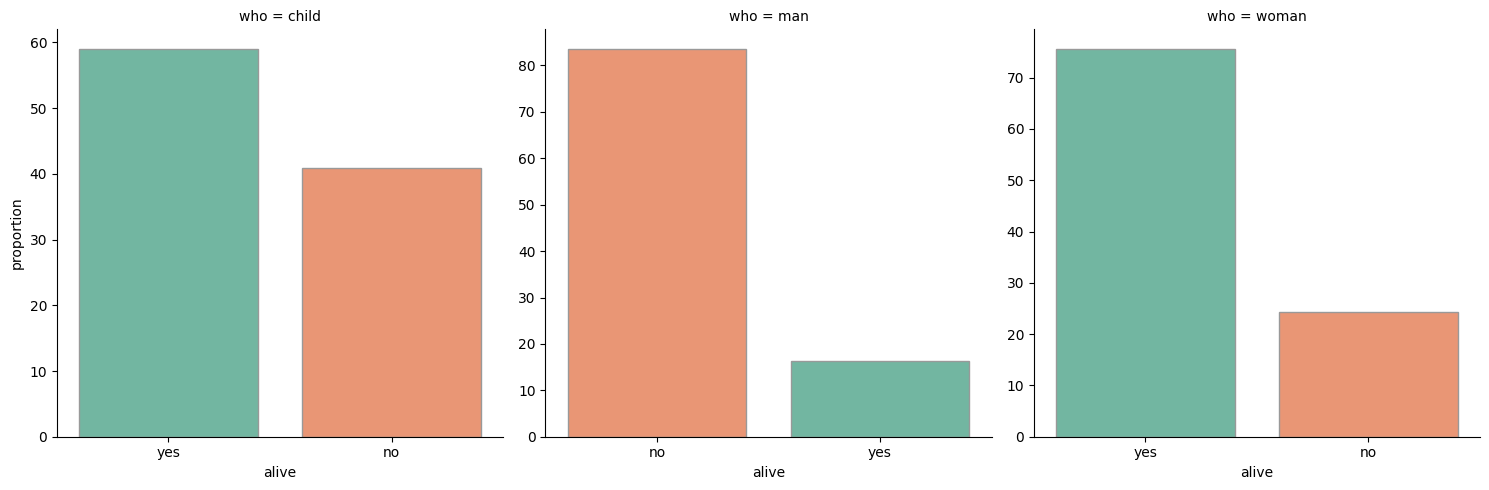

In [286]:
# Pintamos modo1
fig = sns.catplot(x="alive",
            y = "proportion",
            col="who",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            palette="Set2",
            data=frecuencias_relativas,
            sharex=False,
            sharey=False,
            orient="x"
           );
fig.savefig("./data/who_alive.png")  # Guardar como PNG

In [263]:
cat_colx = "alive"
cat_coly ="class"
frecuencias_absolutas = df_titanic.groupby(cat_coly,as_index=False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby(cat_coly,as_index=False)[cat_colx].value_counts(normalize=True)
print(frecuencias_relativas)
print(frecuencias_absolutas)
frecuencias_relativas["proportion"] *= 100
frecuencias_relativas['class'] = frecuencias_relativas['class'].astype(str)
frecuencias_relativas

    class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363
    class alive  count
0   First   yes    136
1   First    no     80
2  Second    no     97
3  Second   yes     87
4   Third    no    372
5   Third   yes    119


,class,alive,proportion
0,First,yes,62.962963
1,First,no,37.037037
2,Second,no,52.717391
3,Second,yes,47.282609
4,Third,no,75.763747
5,Third,yes,24.236253


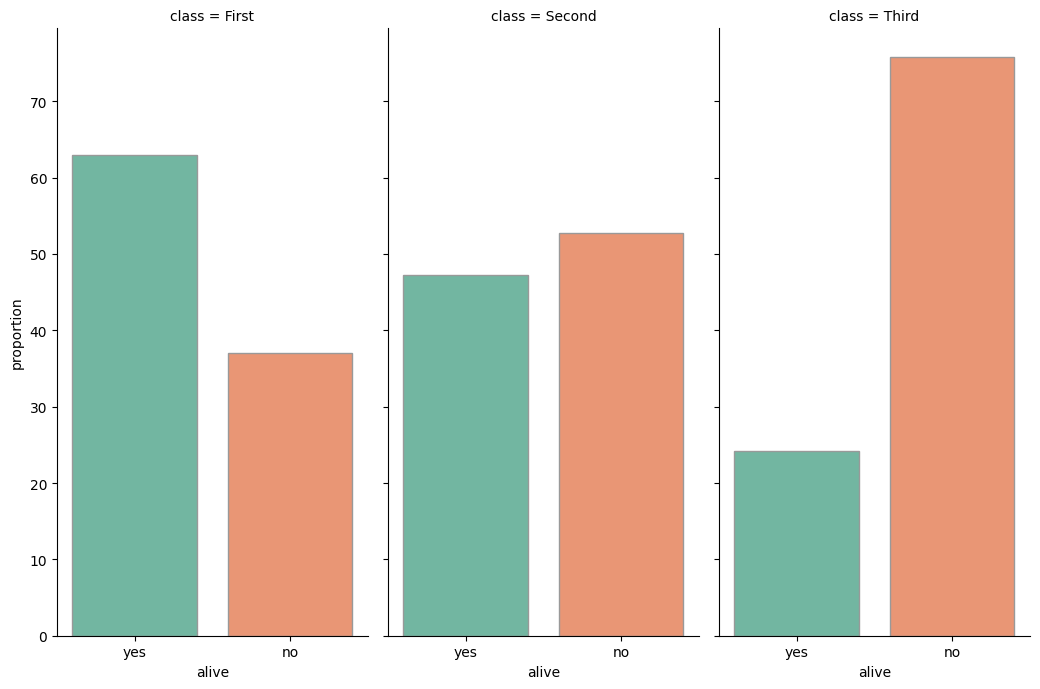

In [266]:
# Pintamos modo1
plot = sns.catplot(x="alive",
            y = "proportion",
            col="class",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            palette="Set2",
            data=frecuencias_relativas,
            height=7,
            aspect=0.5)


plot.savefig("./data/class_alive.png")  # Guardar como PNG

In [287]:
df_titanic_fil = df_titanic[df_titanic["who"] != "man"]

cat_colx = "alive"
cat_coly ="who"
frecuencias_absolutas = df_titanic_fil.groupby(cat_coly,as_index=False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic_fil.groupby(cat_coly,as_index=False)[cat_colx].value_counts(normalize=True)
print(frecuencias_relativas)
print(frecuencias_absolutas)
frecuencias_relativas["proportion"] *= 100
frecuencias_relativas['who'] = frecuencias_relativas['who'].astype(str)

     who alive  proportion
0  child   yes    0.590361
1  child    no    0.409639
2  woman   yes    0.756458
3  woman    no    0.243542
     who alive  count
0  child   yes     49
1  child    no     34
2  woman   yes    205
3  woman    no     66


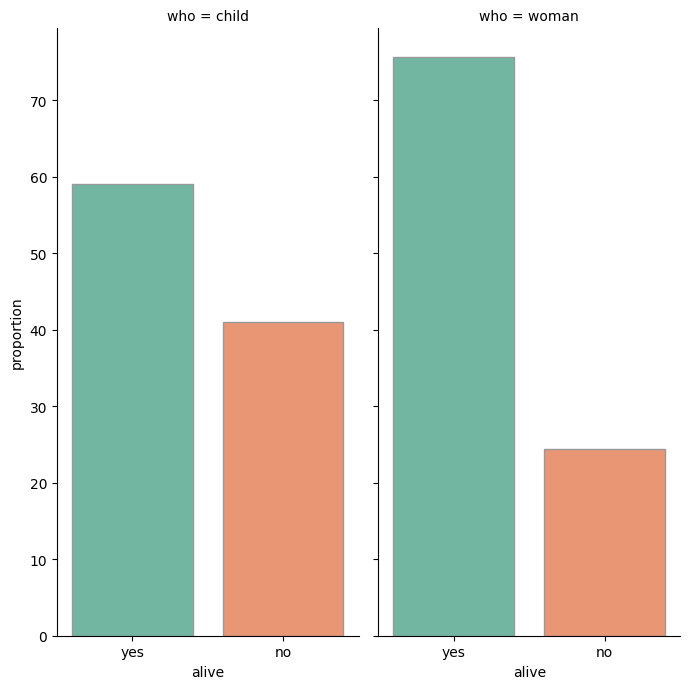

In [288]:
plot= sns.catplot(x="alive",
            y = "proportion",
            col="who",
            hue = "alive",
            kind="bar", # Ojo, cambio el tipo de gráfico (ahora no "cuento" filas)
            edgecolor=".6",
            palette="Set2",
            data=frecuencias_relativas,
            height=7,
            aspect=0.5)


plot.savefig("./data/woman_child_alive.png")  # Guardar como PNG

In [273]:

tabla_contingencia = pd.crosstab(df_titanic["embark_town"],
                                 df_titanic["alive"],
                                 margins=False)
tabla_contingencia

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,217


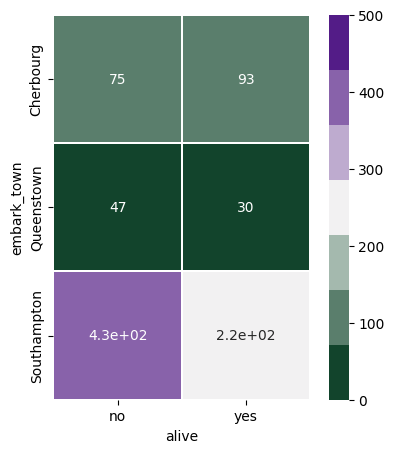

In [274]:
#AC
plt.figure(figsize=(5,5))
sns.heatmap(tabla_contingencia,
            vmin=0,
            vmax=500,
            cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
            square=True,
            linewidths=.1,
            annot=True);
plt.savefig("./data/embark_alive.png")  # Guardar como PNG

In [275]:
#AC
tabla_contingencia = pd.crosstab(df_titanic["deck"],
                                 df_titanic["alive"],
                                 margins=False)
tabla_contingencia

alive,no,yes
deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2


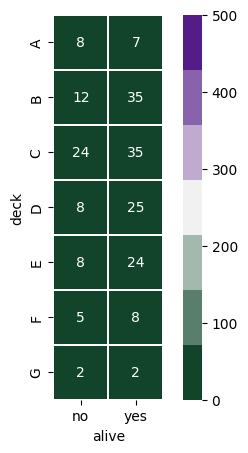

In [276]:
#AC
plt.figure(figsize=(5,5))
sns.heatmap(tabla_contingencia,
            vmin=0,
            vmax=500,
            cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
            square=True,
            linewidths=.1,
            annot=True);
plt.savefig("./data/deck_alive.png")  # Guardar como PNG